In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset.csv') # Load the data

In [3]:
data.head() # Display the first 5 rows of the data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
data.drop(['day', 'month', 'year'], axis=1, inplace=True) # Drop the columns day, month and year

In [5]:
data.head() # Display the first 5 rows of the data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [7]:
data.info() # Check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  245 non-null    object
 1    RH          245 non-null    object
 2    Ws          245 non-null    object
 3   Rain         245 non-null    object
 4   FFMC         245 non-null    object
 5   DMC          245 non-null    object
 6   DC           245 non-null    object
 7   ISI          245 non-null    object
 8   BUI          245 non-null    object
 9   FWI          245 non-null    object
 10  Classes      244 non-null    object
dtypes: object(11)
memory usage: 21.4+ KB


In [18]:
data = data.drop(data[data.isna().any(axis=1)].index).reset_index(drop=True) # Drop the rows with missing values

In [21]:
integer_cols = ['Temperature', 'RH', 'Ws'] # Integer columns
floating_cols = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] # Floating columns

In [28]:
# removing spaces from column names using strip
data.columns = data.columns.str.strip()

In [31]:
# checking unique values in classes column
data['Classes'].unique()

array(['not fire', 'fire', 'Classes'], dtype=object)

In [30]:
# First, strip all leading and trailing spaces
data['Classes'] = data['Classes'].str.strip()

# Then, use contains to check for specific patterns and replace accordingly
data['Classes'] = data['Classes'].replace({'fire': 'fire', 'not fire': 'not fire'}, regex=True)

# Check if there are any other unexpected values left
print(data['Classes'].unique())

['not fire' 'fire' 'Classes']


In [33]:
data = data.drop(data[data['Classes'] == 'Classes'].index).reset_index(drop=True) # Drop the rows with 'Classes' as the value

In [35]:
# convert the integer columns to integer data type and the floating columns to float data type
data[integer_cols] = data[integer_cols].astype(int)
data[floating_cols] = data[floating_cols].astype(float)

In [36]:
data.info() # Check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
dtypes: float64(7), int32(3), object(1)
memory usage: 18.2+ KB


In [43]:
# Create 'region' feature
data['region'] = 0  # Initially set all to 0

# Change 'region' to 1 for index 124 onwards
data.loc[124:, 'region'] = 1

print(data['region'].value_counts())

region
0    124
1    119
Name: count, dtype: int64


In [46]:
data.info() # Check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int32  
 1   RH           243 non-null    int32  
 2   Ws           243 non-null    int32  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    object 
 11  region       243 non-null    int64  
dtypes: float64(7), int32(3), int64(1), object(1)
memory usage: 20.1+ KB


In [47]:
data.describe() # Display the summary statistics of the data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.489712
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.500926
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [48]:
data.to_csv('cleaned_forest_fires.csv', index=False) # Save the cleaned data to a new CSV file

In [49]:
# Map 'not fire' to 0 and 'fire' to 1
data['Classes'] = data['Classes'].map({'not fire': 0, 'fire': 1})

# Check if the mapping was done correctly
print(data['Classes'].value_counts())

Classes
1    137
0    106
Name: count, dtype: int64


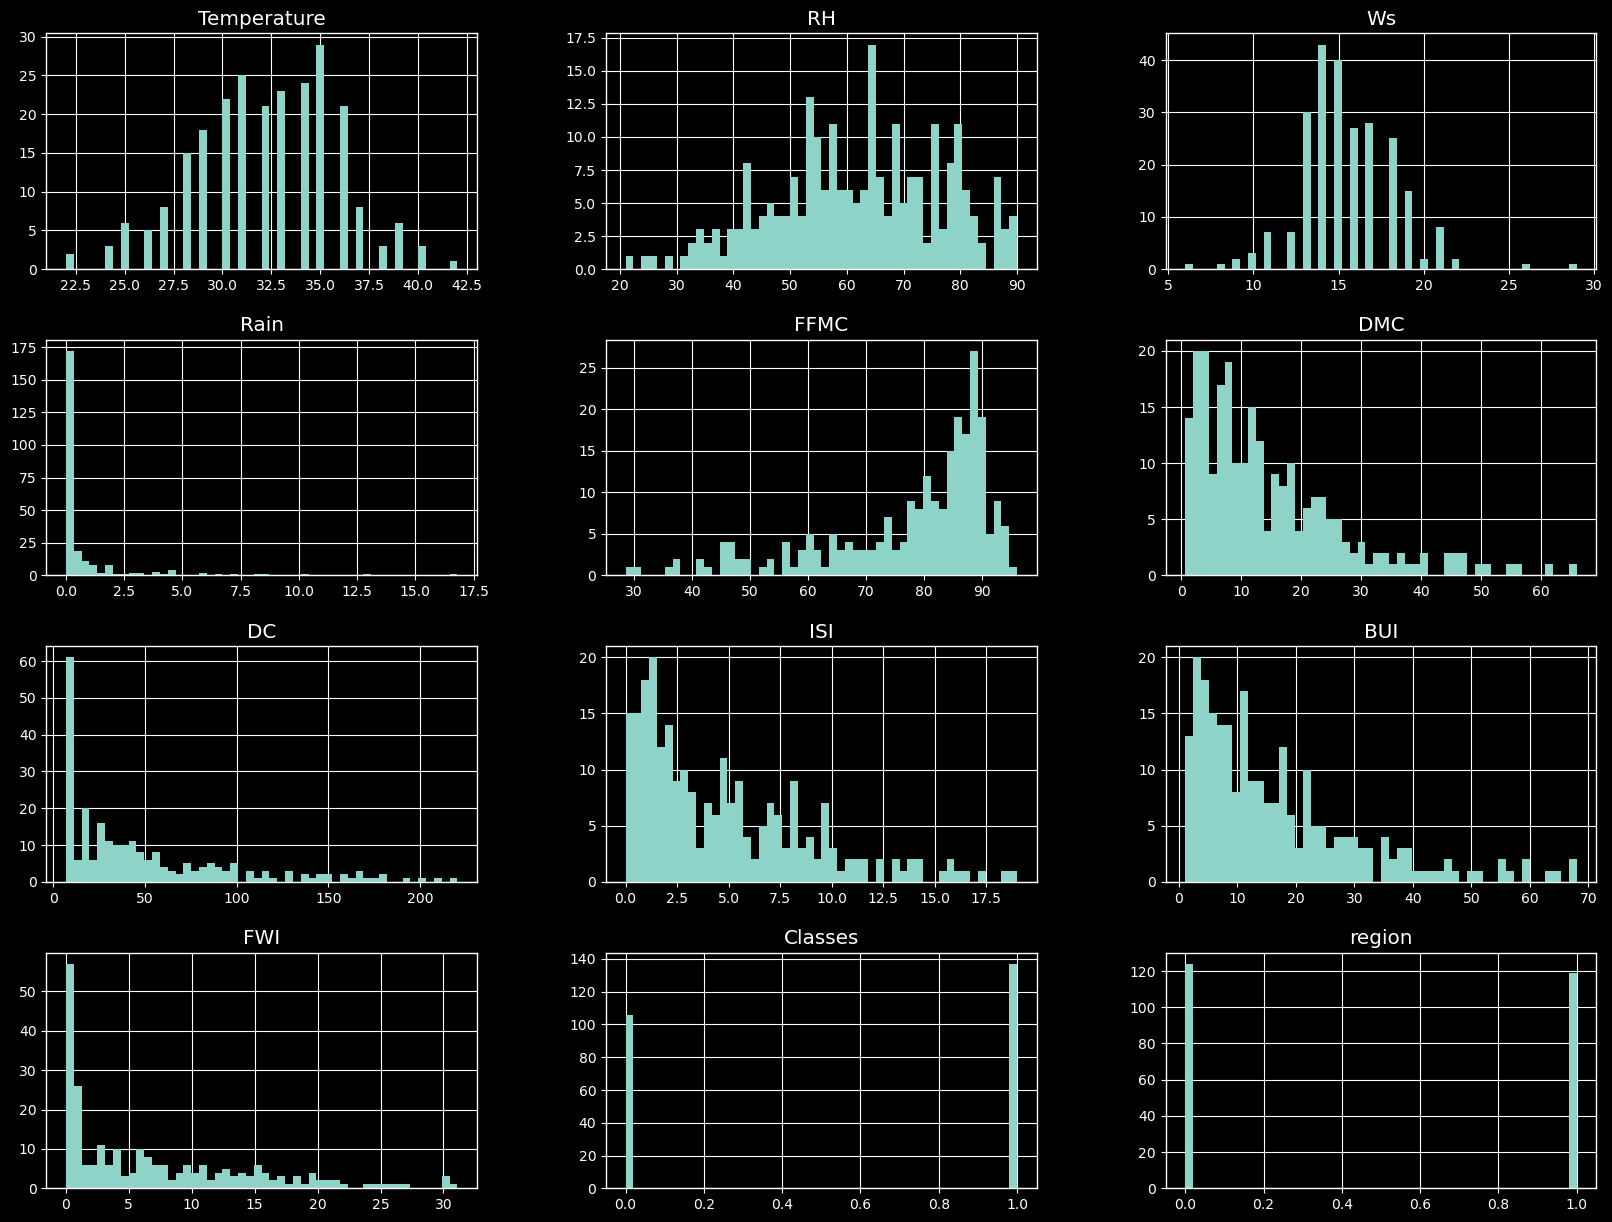

In [90]:
# plotting density plot histogram for all the features
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

# Set the color map
plt.style.use('dark_background')
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [86]:
# percentage for pie-chart
percentage = data['Classes'].value_counts(normalize=True) * 100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

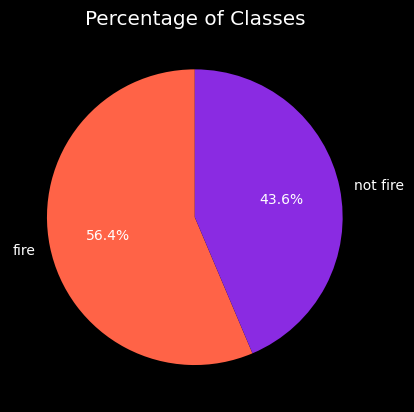

In [91]:
# plotting pie chart
classlabels = ['fire', 'not fire']
plt.Figure(figsize=(15, 15))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%', startangle=90, colors=['tomato', 'blueviolet'])
plt.title('Percentage of Classes')
plt.show()

In [73]:
# observing correlation between features

data.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.274850
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.413844
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.163627
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.053092
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.246939
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.208210
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.064410
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.279702
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.105475
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.212299


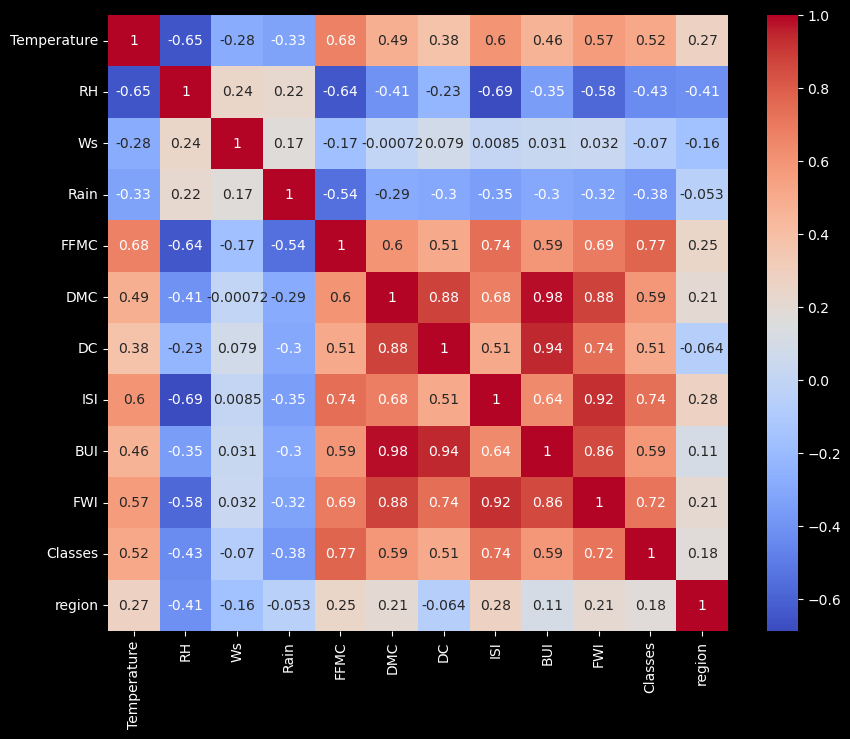

In [78]:
# plotting heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

<Axes: >

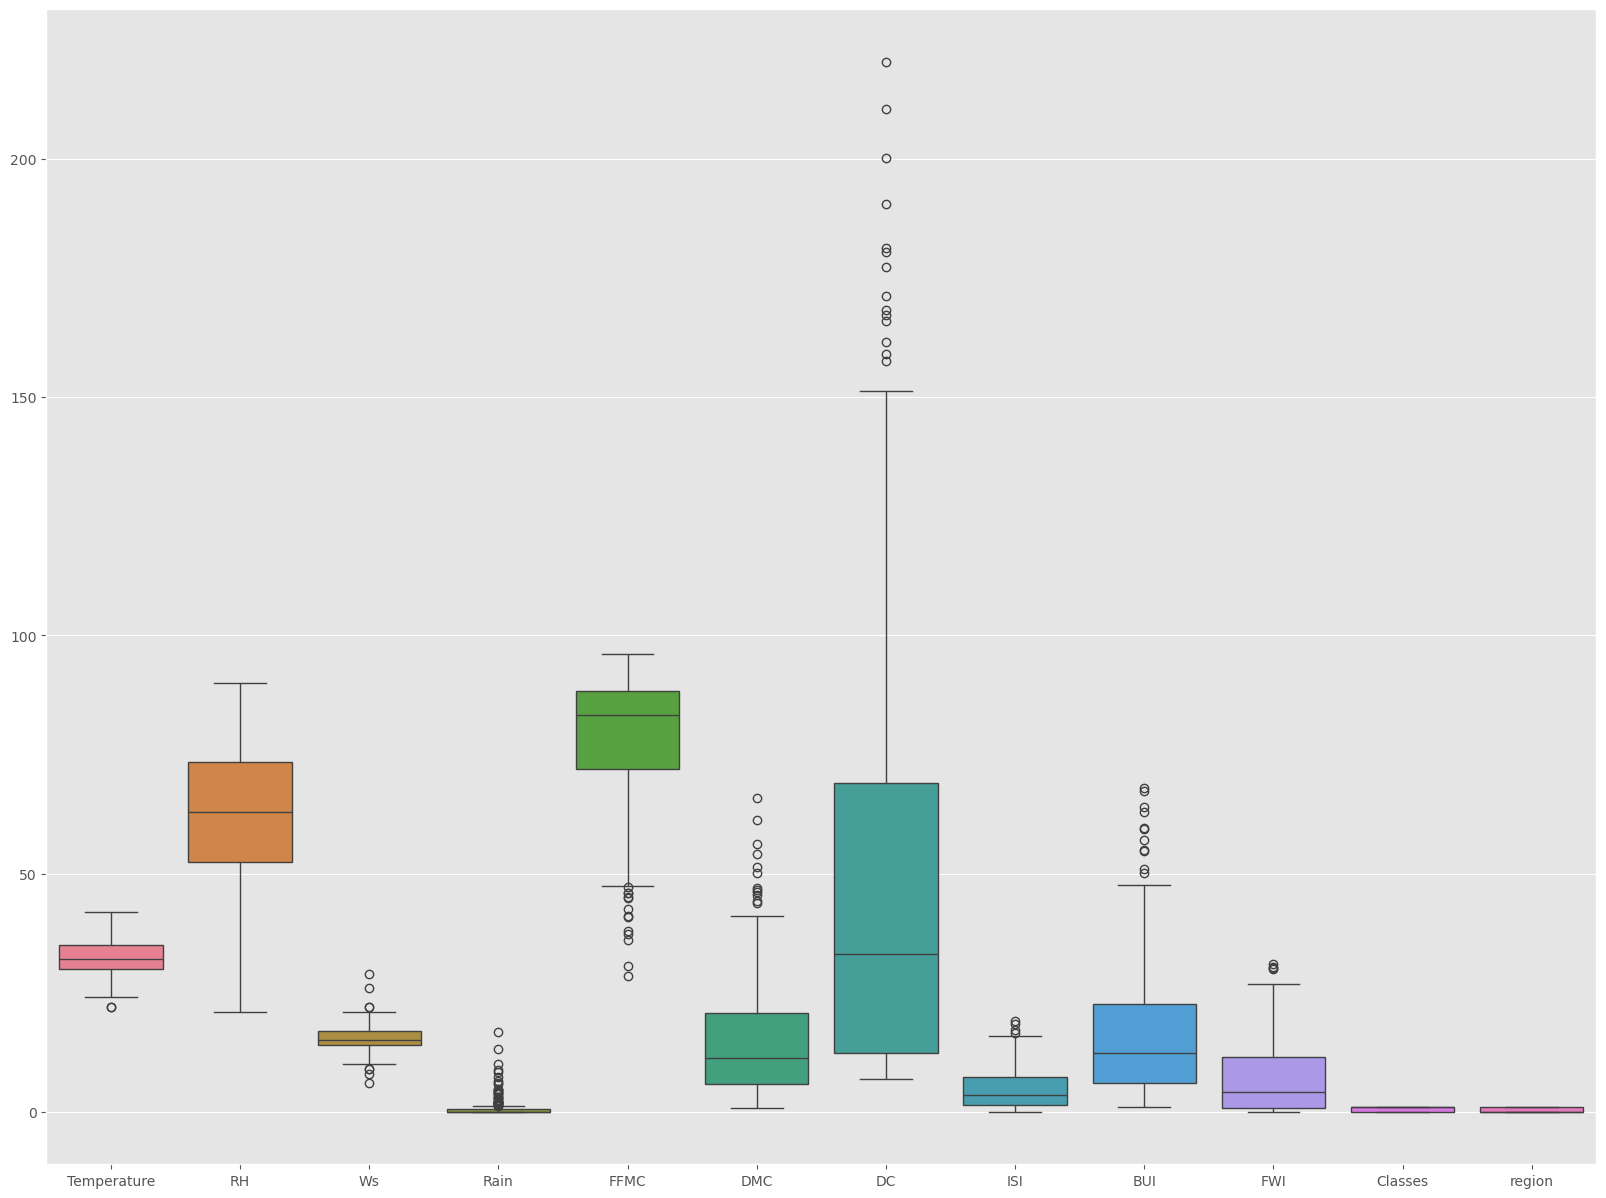

In [92]:
# Box plots for all the features
plt.style.use('ggplot')
plt.figure(figsize=(20, 15))
sns.boxplot(data=data, orient='v')